# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.2: SARSA Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [3]:
class SarsaAgent(Agent):
    
    #def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(SarsaAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        
        self.init = 0        
        self.Q = {}        
#         for s in range(len(state)):
#             for a in actions:
#                 self.Q[(s, a)] = 0.0        
        self.epsilon = 0.5 # epsilon # 注意該數值影響很大
        self.alpha = alpha
        self.gamma = gamma
        
    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        action = np.random.randint(0, self.num_actions) 
       
        ## TODO 2
        ## Implement epsilon greedy policy here
        
        self.init += 1
        
#         # 根據不同state型態找出有多少state狀態
#         if isinstance(state, np.ndarray):            
#             num_state = len(state)
#         else:
#             num_state = state
        
        num_state = len(state)
        
        if self.init == 1:            
            for s in range(num_state):
                for a in range(self.num_actions):
                    self.Q[(s, a)] = 0.0            
        
        if np.random.uniform(0,1) < self.epsilon:        
            return action
        else:            
            action = max( list(range(self.num_actions)), key = lambda x: self.Q[(np.argmax(state),x)] )        
        return action


    def learn(self, state1, action1, reward, state2, action2):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the sarsa update here
        
        """
        SARSA Update
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * Q(s',a') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """
        
        self.Q[(np.argmax(state1), action1)] += self.alpha * (reward + 
                                                              self.gamma * self.Q [(np.argmax(state2), action2)] - 
                                                              self.Q[(np.argmax(state1), action1)])
        #print(self.Q[(np.argmax(state1), action1)])

<IPython.core.display.Javascript object>


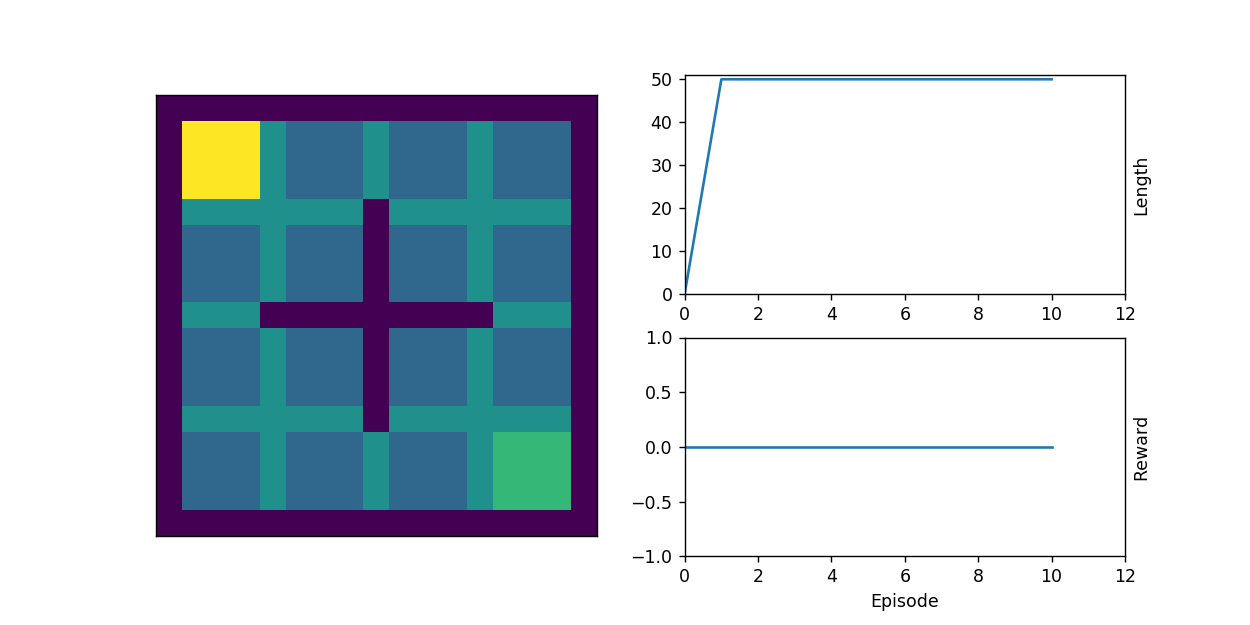

In [4]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(10, interactive)

In [ ]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(50, interactive)

<IPython.core.display.Javascript object>


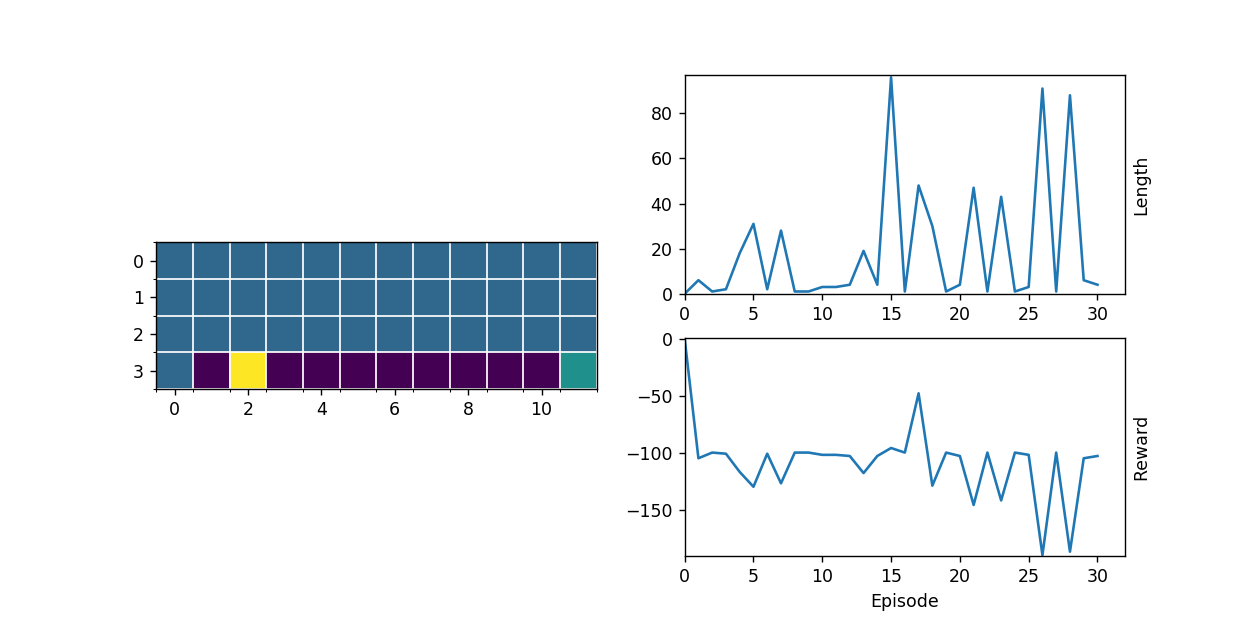

In [6]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(30, interactive)

<Figure size 720x360 with 0 Axes>

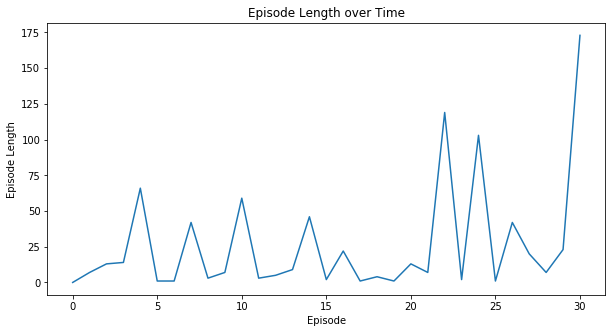

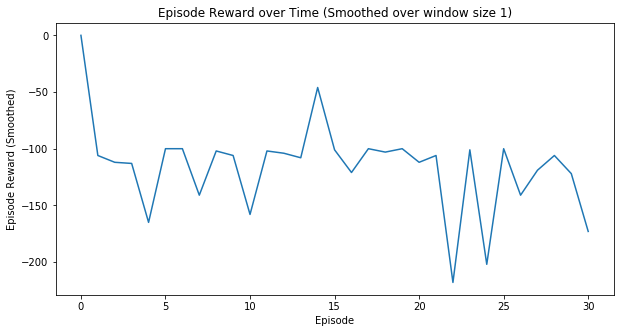

In [5]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = SarsaAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_sarsa(30, interactive)

In [ ]:
# interactive = False
# %matplotlib inline
# env = WindyGridworldEnv()
# agent = SarsaAgent(range(env.action_space.n))
# experiment = Experiment(env, agent)
# experiment.run_sarsa(50, interactive)

In [ ]:
# 函數驗證
import numpy as np
def stateToString(state):
    mystring = ""
    if np.isscalar(state):
        mystring = str(state)
    else:
        for digit in state:
            mystring += str(digit)
    return mystring    
stateToString(14)

In [ ]:
# 驗證函數
np.random.uniform(0,1)

In [ ]:
# 驗證函數
Q = {(0, 0): 0.0, (0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 0.0, (1, 3): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 0.0, (3, 3): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 0.0, (4, 3): 0.0, (5, 0): 0.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0, (6, 0): 0.0, (6, 1): 0.0, (6, 2): 0.0, (6, 3): 0.0, (7, 0): 0.0, (7, 1): 0.0, (7, 2): 0.0, (7, 3): 0.0, (8, 0): 0.0, (8, 1): 0.0, (8, 2): 0.0, (8, 3): 0.0, (9, 0): 0.0, (9, 1): 0.0, (9, 2): 0.0, (9, 3): 0.0, (10, 0): 0.0, (10, 1): 0.0, (10, 2): 0.0, (10, 3): 0.0, (11, 0): 0.0, (11, 1): 0.0, (11, 2): 0.0, (11, 3): 0.0, (12, 0): 0.0, (12, 1): 0.0, (12, 2): 0.0, (12, 3): 0.0, (13, 0): 0.0, (13, 1): 0.0, (13, 2): 0.0, (13, 3): 0.0, (14, 0): 0.0, (14, 1): 0.0, (14, 2): 0.0, (14, 3): 0.0, (15, 0): 0.0, (15, 1): 0.0, (15, 2): 0.0, (15, 3): 0.0}
num_actions, state = 4, 1
max( list(range(num_actions)), key = lambda x: Q[(state,x)] )

In [ ]:
# 驗證 sarsa 
from collections import defaultdict
defaultdict(lambda: np.zeros(4))